In [349]:
import dask.dataframe as dd
from dask.distributed import Client

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', 1000)

In [3]:
client = Client()

In [6]:
station_dict = {'松山機場': '松山機場_0',
                 '中山國中': '中山國中_1',
                 '南京復興': '南京復興_2',
                 '忠孝復興': '忠孝復興_3',
                 '大安': '大安_4',
                 '科技大樓': '科技大樓_5',
                 '六張犁': '六張犁_6',
                 '麟光': '麟光_7',
                 '辛亥': '辛亥_8',
                 '萬芳醫院': '萬芳醫院_9',
                 '萬芳社區': '萬芳社區_10',
                 '木柵': '木柵_11',
                 '動物園': '動物園_12',
                 '大直': '大直_13',
                 '劍南路': '劍南路_14',
                 '西湖': '西湖_15',
                 '港墘': '港墘_16',
                 '文德': '文德_17',
                 '內湖': '內湖_18',
                 '大湖公園': '大湖公園_19',
                 '葫洲': '葫洲_20',
                 '東湖': '東湖_21',
                 '南港軟體園區': '南港軟體園區_22',
                 '南港展覽館': '南港展覽館_23',
                 '小碧潭': '小碧潭_24',
                 '新店': '新店_25',
                 '新店區公所': '新店區公所_26',
                 '七張': '七張_27',
                 '大坪林': '大坪林_28',
                 '景美': '景美_29',
                 '萬隆': '萬隆_30',
                 '公館': '公館_31',
                 '台電大樓': '台電大樓_32',
                 '古亭': '古亭_33',
                 '中正紀念堂': '中正紀念堂_34',
                 '小南門': '小南門_35',
                 '頂溪': '頂溪_36',
                 '永安市場': '永安市場_37',
                 '景安': '景安_38',
                 '南勢角': '南勢角_39',
                 '台大醫院': '台大醫院_40',
                 '台北車站': '台北車站_41',
                 '中山': '中山_42',
                 '雙連': '雙連_43',
                 '民權西路': '民權西路_44',
                 '圓山': '圓山_45',
                 '劍潭': '劍潭_46',
                 '士林': '士林_47',
                 '芝山': '芝山_48',
                 '明德': '明德_49',
                 '石牌': '石牌_50',
                 '唭哩岸': '唭哩岸_51',
                 '奇岩': '奇岩_52',
                 '北投': '北投_53',
                 '新北投': '新北投_54',
                 '復興崗': '復興崗_55',
                 '忠義': '忠義_56',
                 '關渡': '關渡_57',
                 '竹圍': '竹圍_58',
                 '紅樹林': '紅樹林_59',
                 '淡水': '淡水_60',
                 '頂埔': '頂埔_61',
                 '永寧': '永寧_62',
                 '土城': '土城_63',
                 '海山': '海山_64',
                 '亞東醫院': '亞東醫院_65',
                 '府中': '府中_66',
                 '板橋': '板橋_67',
                 '新埔': '新埔_68',
                 '江子翠': '江子翠_69',
                 '龍山寺': '龍山寺_70',
                 '西門': '西門_71',
                 '善導寺': '善導寺_72',
                 '忠孝新生': '忠孝新生_73',
                 '忠孝敦化': '忠孝敦化_74',
                 '國父紀念館': '國父紀念館_75',
                 '市政府': '市政府_76',
                 '永春': '永春_77',
                 '後山埤': '後山埤_78',
                 '昆陽': '昆陽_79',
                 '南港': '南港_80',
                 '象山': '象山_81',
                 '台北101/世貿': '台北101/世貿_82',
                 '信義安和': '信義安和_83',
                 '大安森林公園': '大安森林公園_84',
                 '北門': '北門_85',
                 '松江南京': '松江南京_86',
                 '台北小巨蛋': '台北小巨蛋_87',
                 '南京三民': '南京三民_88',
                 '松山': '松山_89',
                 '輔大': '輔大_90',
                 '新莊': '新莊_91',
                 '頭前庄': '頭前庄_92',
                 '先嗇宮': '先嗇宮_93',
                 '三重': '三重_94',
                 '菜寮': '菜寮_95',
                 '台北橋': '台北橋_96',
                 '大橋頭站': '大橋頭站_97',
                 '中山國小': '中山國小_98',
                 '行天宮': '行天宮_99',
                 '東門': '東門_100',
                 '蘆洲': '蘆洲_101',
                 '三民高中': '三民高中_102',
                 '徐匯中學': '徐匯中學_103',
                 '三和國中': '三和國中_104',
                 '三重國小': '三重國小_105',
                 '迴龍': '迴龍_106',
                 '丹鳳': '丹鳳_107'}

# Monthly Data

In [9]:
# view chinese font correctly
import matplotlib as mpl
font_name = "Simhei"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False
import geopandas as gpd

In [10]:
station = gpd.read_file('Data/shp/MRTstations/sub_estate.shp', encoding='utf8')
stat = station.reindex(columns=['NAME', 'station_id', 'geometry'])

## Functions

In [177]:
def read_monthly_data(year_month=201809):
    sm = dd.read_csv('Data/subway_monthly/' + str(year_month) + '.csv', 
                     skiprows=[1], skipfooter=2, sep="\s+", error_bad_lines=False)
    sm = sm.reset_index(drop=False).compute()
    sm.columns = ['Date', 'Time', 'Entry', 'Exit', 'Rides']
    sm['Date'] = sm.Date.astype('datetime64[ns]')
    sm.set_index('Date', inplace=True)
    sm['Hours'] = sm.Time.apply(lambda x: '5' if 5 <= x < 12 
                                       else '12' if 12 <= x < 18 else '18')
    sm['DOW'] = sm.index.day_name()
    sm['Weekend'] = sm.DOW.apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
    return sm

In [87]:
def focus_station(EntryorExit='Entry', station='忠孝復興', hour='5',DOW=None, df=sm):
    """
    input: a dataframe with Datetime, Entry, Exit, Eides, Hours, DOW
    return: a filtered and sjoined dataframe focus on one station (as entry or exit), at '5', '12', or '18' Hours group
    """
    
    zx = sm.loc[sm[EntryorExit] == station]
    if DOW != None:
        zxg = pd.DataFrame(zx.groupby(['Entry', 'Exit', 'Hours', 'DOW'])['Rides'].sum())
    else:
        zxg = pd.DataFrame(zx.groupby(['Entry', 'Exit', 'Hours'])['Rides'].sum())
    zxg = zxg.reset_index()
    right_on = {'Entry': 'Exit', 'Exit': 'Entry'}
    stat_zxg = stat.merge(zxg, left_on='NAME', right_on=right_on[EntryorExit])
    stat_zxg_5 = stat_zxg[stat_zxg.Hours == str(hour)]
    if DOW != None:
        stat_zxg_5 = stat_zxg[stat_zxg.DOW == DOW]
    stat_zxg_5['RidesN'] = stat_zxg_5.Rides.apply(lambda x: (x - stat_zxg_5.Rides.min()) / (stat_zxg_5.Rides.max() - stat_zxg_5.Rides.min()))
    return stat_zxg_5

In [178]:
sm = read_monthly_data()

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/dask/dataframe/io/csv.py:382: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  head = reader(BytesIO(b_sample), **kwargs)


In [180]:
sm.tail()

Time Entry  Exit  Rides Hours     DOW  Weekend
Date                                                      
2018-09-30    23    丹鳳  徐匯中學      1    18  Sunday        1
2018-09-30    23    丹鳳  三和國中      1    18  Sunday        1
2018-09-30    23    丹鳳  三重國小      0    18  Sunday        1
2018-09-30    23    丹鳳    迴龍      2    18  Sunday        1
2018-09-30    23    丹鳳    丹鳳      2    18  Sunday        1

## Exploratory

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


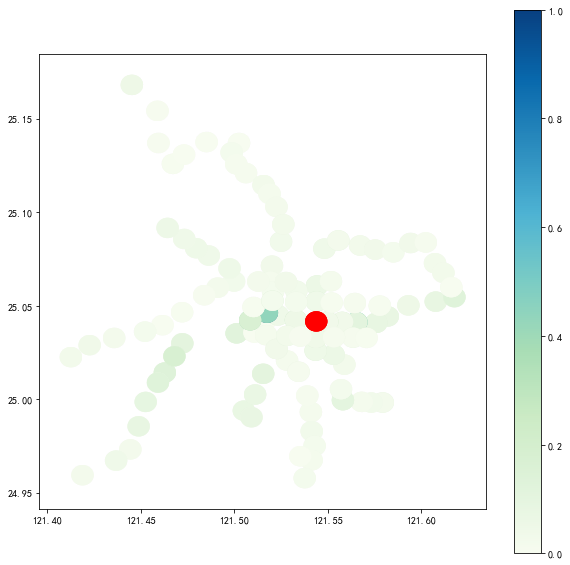

In [90]:
stat_xzg_5 = focus_station('Exit', station='忠孝復興', DOW='Saturday', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True)
stat_xzg_5[stat_xzg_5['NAME'] == '忠孝復興'].plot(color='r', ax=ax)

In [93]:
stat_xzg_5.loc[stat_xzg_5.RidesN > 0.3]

NAME  station_id                                           geometry  \
674    市政府          76  POLYGON ((121.5652594540001 25.04659534700005,...   
681    市政府          76  POLYGON ((121.5652594540001 25.04659534700005,...   
1017    新埔          68  POLYGON ((121.467987028 25.02841241700003, 121...   
1136  台北車站          41  POLYGON ((121.517438025 25.05164953500002, 121...   
1143  台北車站          41  POLYGON ((121.517438025 25.05164953500002, 121...   
1157    西門          71  POLYGON ((121.508487734 25.04762905200005, 121...   
1164    西門          71  POLYGON ((121.508487734 25.04762905200005, 121...   

     Entry  Exit Hours       DOW  Rides    RidesN  
674   忠孝復興   市政府    12  Saturday   7955  0.628985  
681   忠孝復興   市政府    18  Saturday   5410  0.427656  
1017  忠孝復興    新埔    18  Saturday   3951  0.312238  
1136  忠孝復興  台北車站    12  Saturday  12645  1.000000  
1143  忠孝復興  台北車站    18  Saturday  10842  0.857369  
1157  忠孝復興    西門    12  Saturday   5461  0.431691  
1164  忠孝復興    西門    18  Saturday   5620  0.444269

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


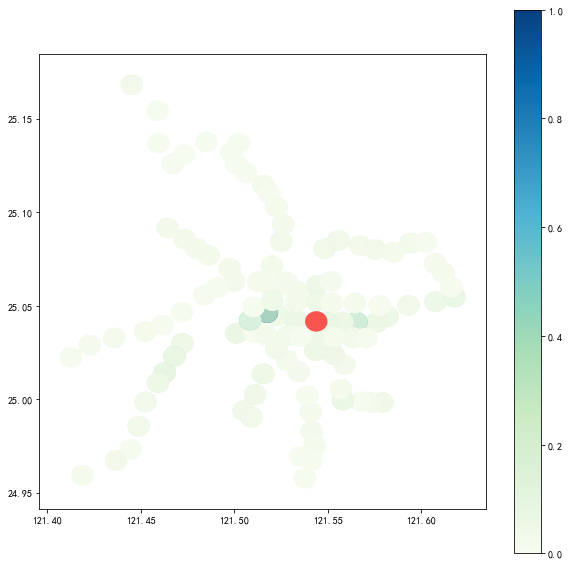

In [95]:
stat_xzg_5 = focus_station('Entry', station='忠孝復興', DOW='Saturday', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True, alpha= 0.8)
stat_xzg_5[stat_xzg_5['NAME'] == '忠孝復興'].plot(color='r', ax=ax, alpha=0.3)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


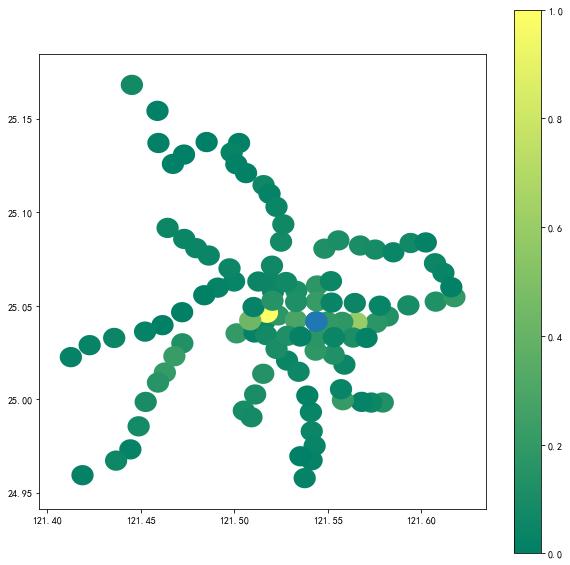

In [312]:
stat_xzg_5 = focus_station('Exit', station='忠孝復興', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True)
stat_zxg_5[stat_zxg_5['NAME'] == '忠孝復興'].plot(ax=ax)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


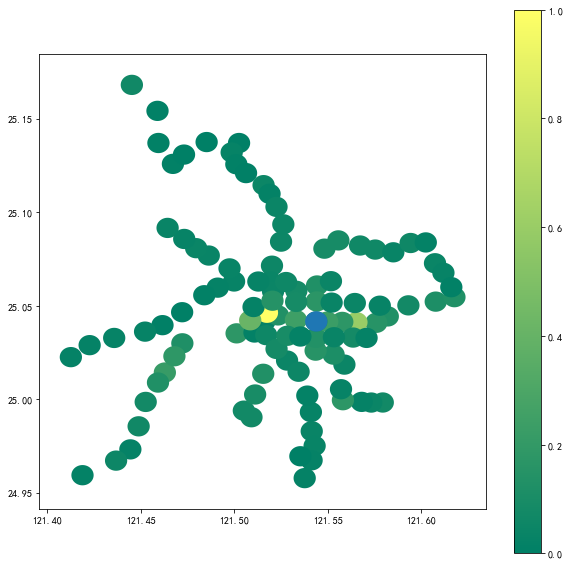

In [75]:
stat_xzg_5 = focus_station('Entry', station='忠孝復興', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='summer', legend=True)
stat_xzg_5[stat_xzg_5['NAME'] == '忠孝復興'].plot(ax=ax)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


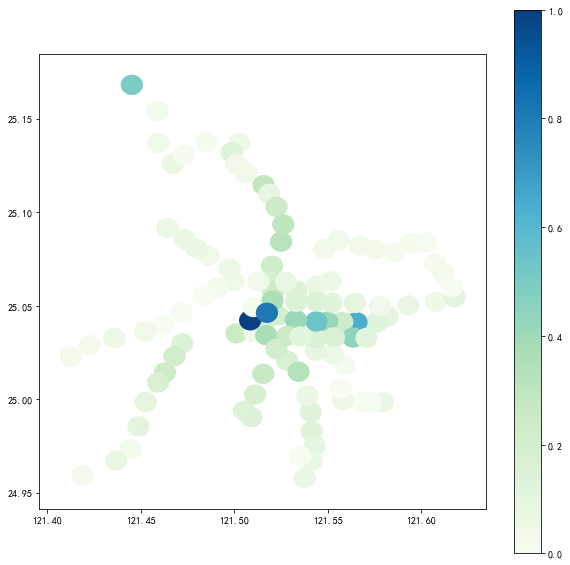

In [80]:
stat_xzg_5 = focus_station('Entry', station='台北車站', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True)
stat_xzg_5[stat_xzg_5['NAME'] == '台北車站'].plot(ax=ax)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


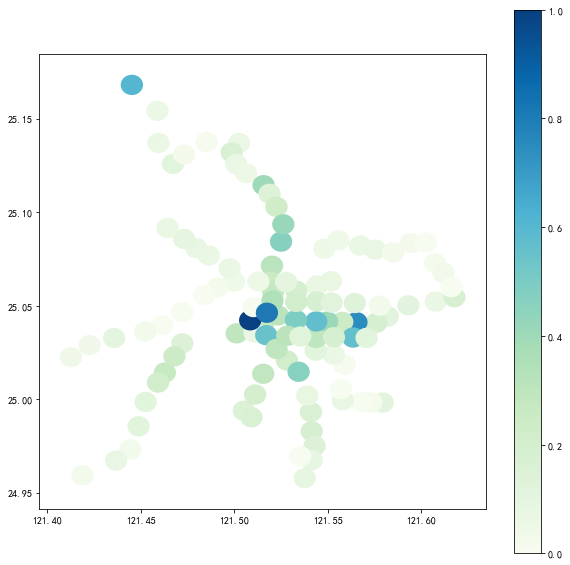

In [79]:
stat_xzg_5 = focus_station('Exit', station='台北車站', hour='12')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True)
stat_xzg_5[stat_xzg_5['NAME'] == '台北車站'].plot(ax=ax)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


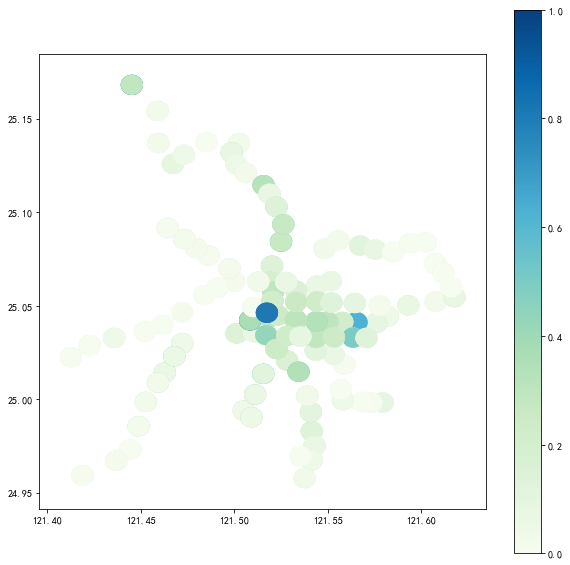

In [97]:
stat_xzg_5 = focus_station('Entry', station='台北車站', DOW='Monday', hour='5')
plt.figure(figsize=(10, 10))
ax = plt.subplot()
stat_xzg_5.plot(column='RidesN', ax=ax, cmap='GnBu', legend=True)
stat_xzg_5[stat_xzg_5['NAME'] == '台北車站'].plot(ax=ax)

# Bayesian Network

In [105]:
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, ParameterEstimator
import numpy as np

In [181]:
sm.head()

Time Entry  Exit  Rides Hours       DOW  Weekend
Date                                                        
2018-09-01     0  松山機場  松山機場      0    18  Saturday        1
2018-09-01     0  松山機場  中山國中      0    18  Saturday        1
2018-09-01     0  松山機場  南京復興      0    18  Saturday        1
2018-09-01     0  松山機場  忠孝復興      0    18  Saturday        1
2018-09-01     0  松山機場    大安      0    18  Saturday        1

In [232]:
model = BayesianModel([('Entry', 'CRides'),
                       ('Exit', 'CRides'),
                       ('Hours', 'CRides'),
                       ('Weekend', 'CRides')])

In [19]:
sm.columns

Index(['Time', 'Entry', 'Exit', 'Rides', 'Hours', 'DOW'], dtype='object')

In [315]:
def prepare_training(df):
    data = df.reset_index(drop=True)
#     data['lgRides'] = np.log(data.Rides + 1)
#     data['CRides'] = pd.cut(data.lgRides, bins=6, labels=range(6))

    p_bins = np.unique(np.percentile(
        data.Rides
        , np.linspace(0, 1, num=10, endpoint=False)[1:] * 100
    ))#[1:]



    data['CRides'] = pd.cut(
        data.Rides
        , bins=p_bins
        , right=False    
    #     , labels=range(p_bins.size - 1)
    )
    
    data = data.reindex(columns=['Entry', 'Exit', 'CRides', 'Hours', 'Weekend'])
    return data

In [316]:
data_perc = prepare_training(sm)

In [183]:
data = sm.reset_index(drop=True)

(array([7.319817e+06, 2.365800e+04, 3.586000e+03, 8.220000e+02,
        2.730000e+02, 1.040000e+02, 2.800000e+01, 9.000000e+00,
        2.000000e+00, 1.000000e+00]),
 array([   0. ,  158.3,  316.6,  474.9,  633.2,  791.5,  949.8, 1108.1,
        1266.4, 1424.7, 1583. ]),
 <a list of 10 Patch objects>)

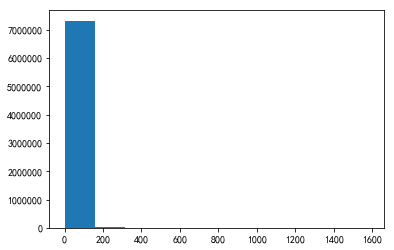

In [136]:
plt.hist(data.Rides)

In [184]:
data['lgRides'] = np.log(data.Rides + 1)

(array([3.425612e+06, 1.070038e+06, 1.203217e+06, 8.459800e+05,
        4.763260e+05, 2.254800e+05, 7.802600e+04, 2.036700e+04,
        3.073000e+03, 1.810000e+02]),
 array([0.        , 0.73677086, 1.47354171, 2.21031257, 2.94708343,
        3.68385429, 4.42062514, 5.157396  , 5.89416686, 6.63093772,
        7.36770857]),
 <a list of 10 Patch objects>)

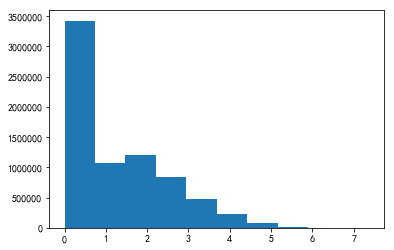

In [138]:
plt.hist(data.lgRides)

In [185]:
data['CRides'] = pd.cut(data.lgRides, bins=6, labels=range(6))

In [151]:
data.columns

Index(['Time', 'Entry', 'Exit', 'Rides', 'Hours', 'DOW', 'lgRides', 'CRides'], dtype='object')

In [193]:
data1 = data.reindex(columns=['Entry', 'Exit', 'Hours', 'Weekend', 'CRides'])

In [150]:
# data.loc[:, ['Entry', 'Exit', 'Hours', 'DOW', 'CRides']]

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Entry      Exit Hours       DOW   CRides
0        松山機場      松山機場    18  Saturday      NaN
1        松山機場      中山國中    18  Saturday      NaN
2        松山機場      南京復興    18  Saturday      NaN
3        松山機場      忠孝復興    18  Saturday      NaN
4        松山機場        大安    18  Saturday      NaN
5        松山機場      科技大樓    18  Saturday      NaN
6        松山機場       六張犁    18  Saturday      NaN
7        松山機場        麟光    18  Saturday      NaN
8        松山機場        辛亥    18  Saturday      NaN
9        松山機場      萬芳醫院    18  Saturday      NaN
10       松山機場      萬芳社區    18  Saturday      NaN
11       松山機場        木柵    18  Saturday      NaN
12       松山機場       動物園    18  Saturday      NaN
13       松山機場        大直    18  Saturday      NaN
14       松山機場       劍南路    18  Saturday      NaN
15       松山機場        西湖    18  Saturday      NaN
16       松山機場        港墘    18  Saturday      NaN
17       松山機場        文德    18  Saturday      NaN
18       松山機場        內湖    18  Saturday      NaN
19       松山機場      大湖公園    18  Saturday      NaN
20       松山機場        葫洲    18  Saturday      NaN
21       松山機場        東湖    18  Saturday      NaN
22       松山機場    南港軟體園區    18  Saturday      NaN
23       松山機場     南港展覽館    18  Saturday      NaN
24       松山機場       小碧潭    18  Saturday      NaN
25       松山機場        新店    18  Saturday      NaN
26       松山機場     新店區公所    18  Saturday      NaN
27       松山機場        七張    18  Saturday      NaN
28       松山機場       大坪林    18  Saturday      NaN
29       松山機場        景美    18  Saturday      NaN
...       ...       ...   ...       ...      ...
7348270    丹鳳       後山埤    18    Sunday      NaN
7348271    丹鳳        昆陽    18    Sunday      NaN
7348272    丹鳳        南港    18    Sunday      NaN
7348273    丹鳳        象山    18    Sunday      NaN
7348274    丹鳳  台北101/世貿    18    Sunday      NaN
7348275    丹鳳      信義安和    18    Sunday      NaN
7348276    丹鳳    大安森林公園    18    Sunday      NaN
7348277    丹鳳        北門    18    Sunday      NaN
7348278    丹鳳      松江南京    18    Sunday      NaN
7348279    丹鳳     台北小巨蛋    18    Sunday      NaN
7348280    丹鳳      南京三民    18    Sunday      NaN
7348281    丹鳳        松山    18    Sunday      NaN
7348282    丹鳳        輔大    18    Sunday      NaN
7348283    丹鳳        新莊    18    Sunday      NaN
7348284    丹鳳       頭前庄    18    Sunday      NaN
7348285    丹鳳       先嗇宮    18    Sunday      NaN
7348286    丹鳳        三重    18    Sunday      NaN
7348287    丹鳳        菜寮    18    Sunday      NaN
7348288    丹鳳       台北橋    18    Sunday      NaN
7348289    丹鳳      大橋頭站    18    Sunday      NaN
7348290    丹鳳      中山國小    18    Sunday      NaN
7348291    丹鳳       行天宮    18    Sunday      NaN
7348292    丹鳳        東門    18    Sunday      NaN
7348293    丹鳳        蘆洲    18    Sunday      NaN
7348294    丹鳳      三民高中    18    Sunday      NaN
7348295    丹鳳      徐匯中學    18    Sunday      NaN
7348296    丹鳳      三和國中    18    Sunday      NaN
7348297    丹鳳      三重國小    18    Sunday      NaN
7348298    丹鳳        迴龍    18    Sunday      NaN
7348299    丹鳳        丹鳳    18    Sunday      NaN

[7348300 rows x 5 columns]

(array([4.044919e+06, 0.000000e+00, 1.913869e+06, 0.000000e+00,
        1.062385e+06, 0.000000e+00, 2.862840e+05, 0.000000e+00,
        3.948500e+04, 1.358000e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

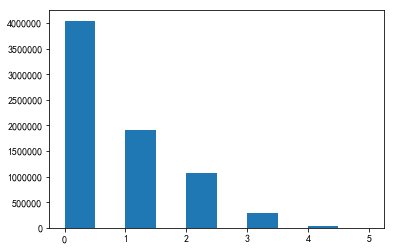

In [142]:
plt.hist(data.CRides)

In [153]:
data.head()

Time Entry  Exit  Rides Hours       DOW  lgRides CRides
0     0  松山機場  松山機場      0    18  Saturday      0.0      0
1     0  松山機場  中山國中      0    18  Saturday      0.0      0
2     0  松山機場  南京復興      0    18  Saturday      0.0      0
3     0  松山機場  忠孝復興      0    18  Saturday      0.0      0
4     0  松山機場    大安      0    18  Saturday      0.0      0

In [194]:
data1.tail()

Entry  Exit Hours  Weekend CRides
7348295    丹鳳  徐匯中學    18        1      0
7348296    丹鳳  三和國中    18        1      0
7348297    丹鳳  三重國小    18        1      0
7348298    丹鳳    迴龍    18        1      0
7348299    丹鳳    丹鳳    18        1      0

## BayesianEstimator

In [320]:
est_perc = BayesianEstimator(model, data_perc)

In [321]:
est_state_perc = est_perc.state_counts('CRides')

In [322]:
est_state__perc_stack = est_state_perc.stack(level=[1])

In [324]:
est_state__perc_stack

Entry                     七張                                   三和國中        \
Hours                     12           18            5           12         
Weekend                    0     1      0     1      0     1      0     1   
CRides       Exit                                                           
[0.0, 1.0)   七張          0.0   1.0   31.0  17.0   24.0  11.0   15.0   3.0   
             三和國中       16.0   4.0   26.0  14.0   48.0  26.0   10.0   1.0   
             三民高中       27.0   2.0   34.0  20.0   48.0  40.0    6.0   2.0   
             三重         45.0  13.0   68.0  33.0   58.0  28.0   13.0   2.0   
             三重國小       15.0   1.0   40.0  20.0   54.0  29.0    2.0   1.0   
             中山          0.0   0.0   35.0  12.0   20.0  10.0    0.0   0.0   
             中山國中       28.0  11.0   76.0  47.0   40.0  30.0   68.0  36.0   
             中山國小        1.0   0.0   48.0  23.0   20.0  15.0    0.0   0.0   
             中正紀念堂       0.0   0.0   45.0  21.0   20.0  10.0    6.0   1.0   
             丹鳳         32.0  10.0   57.0  27.0   70.0  44.0   27.0   2.0   
             亞東醫院        6.0   4.0   36.0  19.0   35.0  27.0   27.0  10.0   
             信義安和        3.0   0.0   39.0  29.0   29.0  22.0    5.0   2.0   
             先嗇宮        56.0  32.0   91.0  58.0   51.0  41.0   16.0  16.0   
             內湖         61.0  26.0   87.0  49.0   57.0  31.0   62.0  24.0   
             公館          0.0   0.0   25.0  14.0   20.0  10.0    1.0   0.0   
             六張犁        72.0  32.0  121.0  64.0  100.0  57.0   31.0  18.0   
             劍南路        37.0   9.0   86.0  44.0   39.0  19.0   53.0   6.0   
             劍潭          1.0   0.0   44.0  20.0   20.0  10.0    3.0   1.0   
             動物園       111.0  43.0  149.0  78.0  128.0  56.0   56.0  24.0   
             北投          9.0   1.0   46.0  24.0   27.0  20.0   32.0  11.0   
             北門          0.0   0.0   48.0  23.0   20.0  10.0   37.0  16.0   
             南京三民        0.0   0.0   28.0  15.0   20.0  11.0    4.0   1.0   
             南京復興        0.0   0.0   40.0  16.0   20.0  12.0    0.0   0.0   
             南勢角         7.0   5.0   39.0  17.0   47.0  29.0    2.0   0.0   
             南港         30.0  15.0   91.0  44.0   37.0  34.0   22.0  10.0   
             南港展覽館      33.0  18.0   59.0  37.0   46.0  25.0   10.0   4.0   
             南港軟體園區    100.0  51.0  141.0  78.0   88.0  53.0  105.0  42.0   
             古亭          0.0   0.0   23.0  12.0   20.0  10.0    0.0   0.0   
             台北101/世貿    1.0   0.0   56.0  23.0   20.0  14.0    0.0   0.0   
             台北小巨蛋       0.0   0.0   42.0  20.0   21.0  11.0    6.0   1.0   
...                      ...   ...    ...   ...    ...   ...    ...   ...   
[10.0, 20.0) 永春          1.0   2.0    2.0   0.0   41.0   2.0    0.0   2.0   
             江子翠        19.0   3.0   31.0   3.0   23.0   2.0    0.0   0.0   
             海山          6.0   0.0   22.0   0.0    0.0   0.0    0.0   0.0   
             淡水         40.0  26.0   41.0  14.0   42.0  15.0    6.0  23.0   
             港墘          0.0   0.0    0.0   0.0   21.0   1.0    0.0   0.0   
             石牌         68.0  24.0   42.0   3.0   22.0  26.0    2.0   0.0   
             科技大樓        0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0   
             竹圍          0.0   1.0    1.0   0.0    0.0   1.0    0.0   0.0   
             紅樹林         0.0   0.0    2.0   0.0    0.0   0.0    0.0   0.0   
             芝山         10.0  22.0   40.0   7.0   38.0  19.0    1.0   9.0   
             菜寮          7.0   1.0   21.0   1.0    0.0   0.0    0.0   1.0   
             萬芳社區        0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0   
             萬芳醫院        0.0   0.0    0.0   0.0    0.0   0.0    0.0   0.0   
             萬隆         55.0  38.0   52.0  30.0   30.0  14.0    0.0   0.0   
             葫洲          0.0   0.0    0.0   0.0    1.0   0.0    0.0   0.0   
             蘆洲          5.0   1.0   27.0   0.0    0.0   2.0    6.0  13.0   
             行天宮        35.0  28.0   25.0   6.0   34.0  31.0   71.0  35.0

In [327]:
est_state__perc_stack.shape

(648, 648)

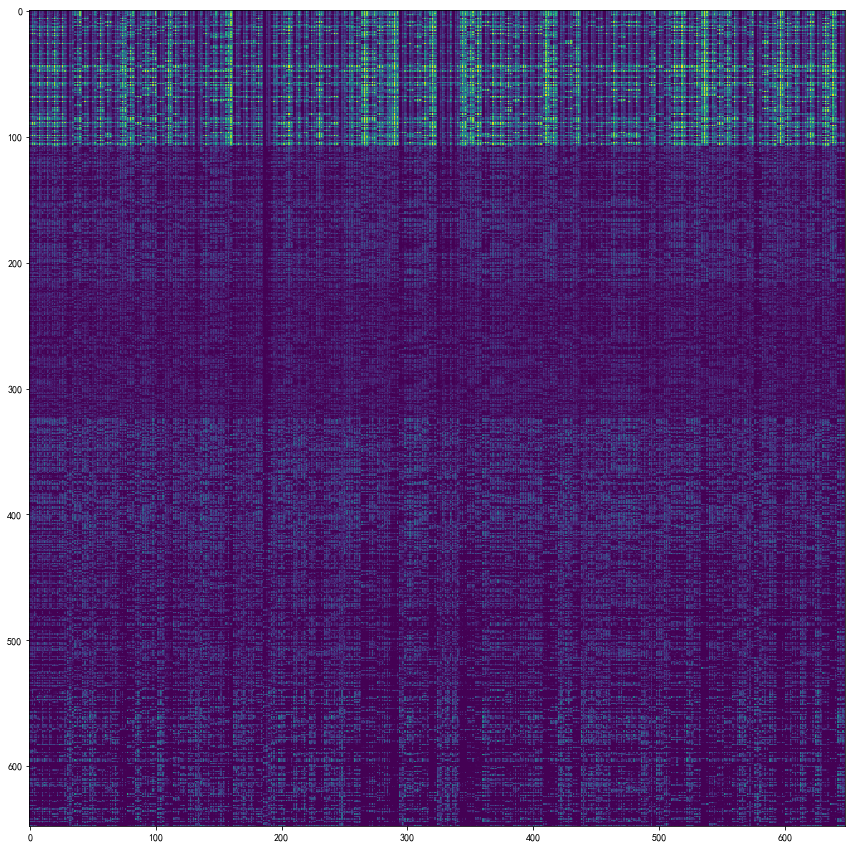

In [323]:
plt.figure(figsize=(15,15))
plt.imshow(est_state__perc_stack)



In [334]:
plt.style.use('seaborn')

Text(0.5, 1.0, 'The Distribution of 6 Clusters of Ridership')

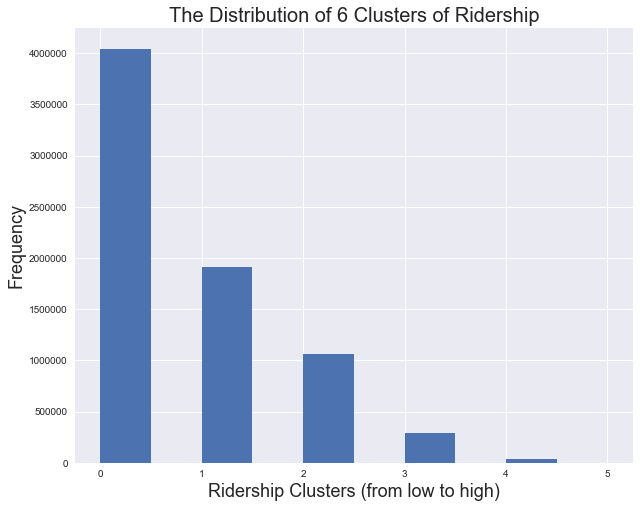

In [340]:


plt.figure(figsize=(10, 8))
plt.hist(data.CRides)
plt.xlabel('Ridership Clusters (from low to high)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('The Distribution of 6 Clusters of Ridership', fontsize=20)

In [309]:
est = BayesianEstimator(model, data)

In [49]:
%%capture cap --no-stderr
print(est.estimate_cpd('Rides'))

with open('sm.txt', 'w', encoding='big5') as f:
    f.write(cap.stdout)

In [242]:
# (est.estimate_cpd('CRides')

In [310]:
est_state = est.state_counts('CRides')

In [198]:
taipei_station = est_state.loc[:, slice('台北車站')].apply(lambda x: x / x.sum(), axis=0)

In [199]:
taipei_station.shape

(6, 20736)

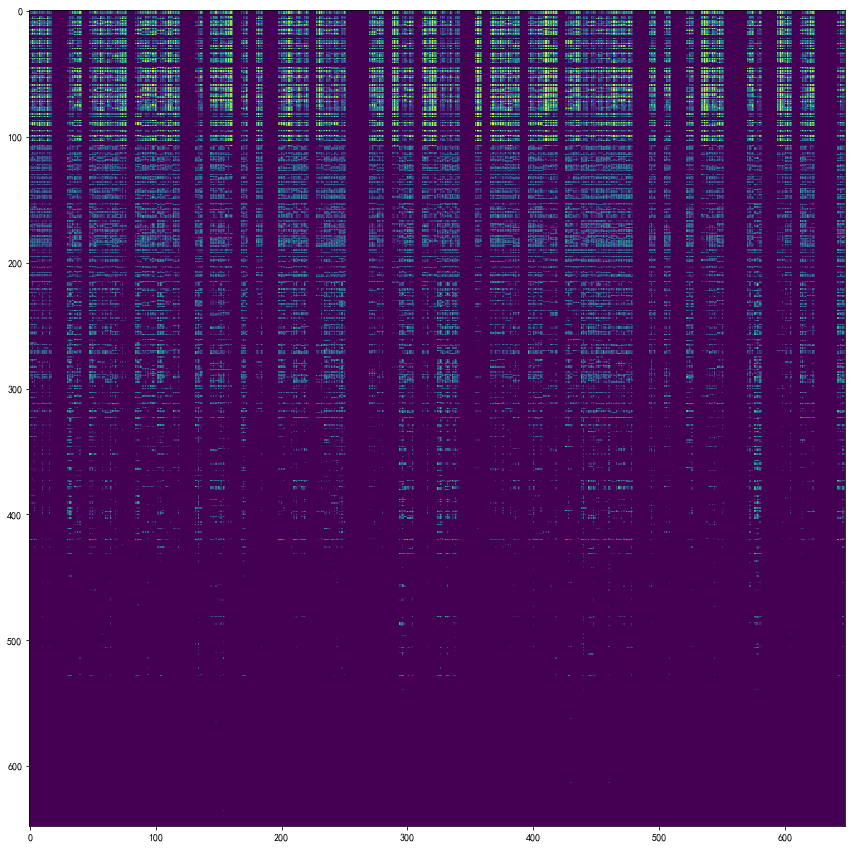

In [312]:
plt.figure(figsize=(15,15))
plt.imshow(est_state_stack)


In [308]:
est_state

EntryCluster      C0                                                     \
ExitCluster       C0                                                 C1   
Hours             12               18                5               12   
Weekend            0       1        0       1        0       1        0   
CRides                                                                    
0             9008.0  4559.0  16131.0  9292.0  13345.0  8406.0  16984.0   
1             7742.0  3850.0   7584.0  3862.0   7384.0  3494.0  12716.0   
2             5361.0  2594.0   5488.0  1986.0   5056.0  1617.0   6754.0   
3             1404.0   751.0   2080.0   532.0   1473.0   203.0   2019.0   
4                5.0     6.0     77.0     8.0    182.0     0.0    167.0   
5                0.0     0.0      0.0     0.0      0.0     0.0      0.0   

EntryCluster                                                               \
ExitCluster                                                    C2           
Hours                      18                 5                12           
Weekend            1        0        1        0        1        0       1   
CRides                                                                      
0             7879.0  27402.0  15844.0  26693.0  15038.0  12843.0  6381.0   
1             6061.0  12848.0   6275.0  10556.0   4892.0  10435.0  5066.0   
2             3984.0   8440.0   2736.0   5684.0   2020.0   6211.0  3193.0   
3             1132.0   2571.0    803.0   1909.0    545.0   2098.0  1079.0   
4              264.0    259.0    102.0    238.0     44.0    272.0   180.0   
5                0.0      0.0      0.0      0.0      1.0     61.0    61.0   

EntryCluster                                                                \
ExitCluster                                            C3                    
Hours              18                 5                12               18   
Weekend             0        1        0        1        0       1        0   
CRides                                                                       
0             21532.0  12556.0  20075.0  11272.0  12188.0  6155.0  18940.0   
1             10774.0   5320.0   8213.0   4418.0   9402.0  4544.0   9029.0   
2              7242.0   2490.0   5990.0   2165.0   4576.0  2290.0   6251.0   
3              2501.0    726.0   2535.0    643.0    692.0   405.0   1539.0   
4               468.0    147.0    420.0    105.0     22.0    46.0     81.0   
5                43.0     41.0      7.0     17.0      0.0     0.0      0.0   

EntryCluster                                                                \
ExitCluster                                   C4                             
Hours                        5                12               18            
Weekend             1        0        1        0       1        0        1   
CRides                                                                       
0             11157.0  18567.0  10703.0  13313.0  6439.0  20640.0  11955.0   
1              4268.0   8168.0   3762.0   8360.0  4425.0   8592.0   4103.0   
2              1991.0   3932.0   1084.0   4408.0  2134.0   5370.0   1582.0   
3               457.0    623.0    129.0    784.0   409.0   1161.0    259.0   
4                47.0     70.0      2.0     15.0    33.0     77.0     21.0   
5                 0.0      0.0      0.0      0.0     0.0      0.0      0.0   

EntryCluster                                                             \
ExitCluster                         C5                                    
Hours               5               12               18               5   
Weekend             0        1       0       1        0       1       0   
CRides                                                                    
0             19102.0  10696.0  6100.0  3060.0  10377.0  6172.0  9219.0   
1              6923.0   3581.0  5075.0  2491.0   5236.0  2386.0  4461.0   
2              3956.0   1195.0  2906.0  1355.0   3426.0  1131.0  2782.0   
3       

In [311]:
est_state_stack = est_state.stack(level=[1])

In [229]:
train = data.reindex(columns=['Entry', 'Exit', 'CRides', 'Hours', 'Weekend'])

In [230]:
train.head()

Entry  Exit CRides Hours  Weekend
0  松山機場  松山機場      0    18        1
1  松山機場  中山國中      0    18        1
2  松山機場  南京復興      0    18        1
3  松山機場  忠孝復興      0    18        1
4  松山機場    大安      0    18        1

In [330]:
sm17 = read_monthly_data(201709)

/Users/twwwy/anaconda3/envs/py37pgm/lib/python3.7/site-packages/dask/dataframe/io/csv.py:382: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  head = reader(BytesIO(b_sample), **kwargs)


In [331]:
data17 = prepare_training(sm17)

In [332]:
data17.head()

Entry  Exit      CRides Hours  Weekend
0  松山機場  松山機場  [0.0, 1.0)    18        0
1  松山機場  中山國中  [0.0, 1.0)    18        0
2  松山機場  南京復興  [1.0, 2.0)    18        0
3  松山機場  忠孝復興  [0.0, 1.0)    18        0
4  松山機場    大安  [1.0, 2.0)    18        0

In [251]:
from sklearn.metrics import accuracy_score

In [294]:
def cal_accuracy(train, model, cluster=False):
    accuracy = []
    for i in range(10):
        train_sampel = train.sample(n=50)
        if cluster == False:
            test_x = train_sampel.reindex(columns=['Entry', 'Exit', 'Hours', 'Weekend'])
        else:
            test_x = train_sampel.reindex(columns=['EntryCluster', 'ExitCluster', 'Hours', 'Weekend'])
        train_y = train_sampel['CRides']
        pred_y = model.predict(test_x)
        score = accuracy_score(train_y.values, pred_y.values)
        accuracy.append(score)
    print(f'accuracy: {np.mean(accuracy)}')

### Testing

In [341]:
cal_accuracy(data, model)

accuracy: 0.714


In [253]:
cal_accuracy(data17, model)

accuracy: 0.6900000000000001


In [246]:
model.fit(train)

## Cluster-Based BN

In [210]:
# with open('Data/sid/cluster_dict.json', 'r') as f:
#     cluster_dict = json.load(f)

In [254]:
# cluster_dict = {
#                 "C-0":['徐匯中學', '三民高中'],
#                 "C-1":['永寧', '景安', '南京復興', '復興崗', '台北橋', '新莊', '丹鳳'],
#                 "C-2":['民權西路', '雙連', '龍山寺'],
#                 "C-3":['科技大樓', '大安', '中山國中', '善導寺', '忠孝新生', '松山機場', '松山', '中山'],
#                 "C-4":['南港', '昆陽', '台電大樓', '景美', '江子翠', '東湖', '南港軟體園區', '萬隆', '公館'],
#                 "C-5":['府中', '新店', '永安市場', '三和國中'],
#                 "C-6":['臺大醫院', '六張犁', '忠孝復興', '中正紀念堂', '台北車', '西門'],
#                 "C-7":['士林', '市政府', '國父紀念館', '忠孝敦化', '信義安和'],
#                 "C-8":['動物園', '萬芳社區', '小碧潭', '迴龍', '頂埔'],
#                 "C-9":['新北投', '亞東醫院', '土城', '新店區公所', '先嗇宮'],
#                 "C-10":['北投', '奇岩', '唭哩岸', '芝山', '劍潭', '木柵', '萬芳醫院', '辛亥', '南港展覽館', '大直', '西湖', '港墘', '大橋頭', '劍南路', '台北101/世貿', '松江南京'],
#                 "C-11":['永春', '板橋', '大坪林', '七張'],
#                 }

In [264]:
k = list(cluster_dict.keys())

In [262]:
a = list(cluster_dict.values())

In [268]:
# cluster_dict = {}

In [273]:
for i in range(len(k)): #k=12, 12clusters
    for item in a[i]: #item = station in cluster i
        cluster_dict[item] = k[i]

In [274]:
cluster_dict

{'徐匯中學': 'C-0',
 '三民高中': 'C-0',
 '永寧': 'C-1',
 '景安': 'C-1',
 '南京復興': 'C-1',
 '復興崗': 'C-1',
 '台北橋': 'C-1',
 '新莊': 'C-1',
 '丹鳳': 'C-1',
 '民權西路': 'C-2',
 '雙連': 'C-2',
 '龍山寺': 'C-2',
 '科技大樓': 'C-3',
 '大安': 'C-3',
 '中山國中': 'C-3',
 '善導寺': 'C-3',
 '忠孝新生': 'C-3',
 '松山機場': 'C-3',
 '松山': 'C-3',
 '中山': 'C-3',
 '南港': 'C-4',
 '昆陽': 'C-4',
 '台電大樓': 'C-4',
 '景美': 'C-4',
 '江子翠': 'C-4',
 '東湖': 'C-4',
 '南港軟體園區': 'C-4',
 '萬隆': 'C-4',
 '公館': 'C-4',
 '府中': 'C-5',
 '新店': 'C-5',
 '永安市場': 'C-5',
 '三和國中': 'C-5',
 '臺大醫院': 'C-6',
 '六張犁': 'C-6',
 '忠孝復興': 'C-6',
 '中正紀念堂': 'C-6',
 '台北車': 'C-6',
 '西門': 'C-6',
 '士林': 'C-7',
 '市政府': 'C-7',
 '國父紀念館': 'C-7',
 '忠孝敦化': 'C-7',
 '信義安和': 'C-7',
 '動物園': 'C-8',
 '萬芳社區': 'C-8',
 '小碧潭': 'C-8',
 '迴龍': 'C-8',
 '頂埔': 'C-8',
 '新北投': 'C-9',
 '亞東醫院': 'C-9',
 '土城': 'C-9',
 '新店區公所': 'C-9',
 '先嗇宮': 'C-9',
 '北投': 'C-10',
 '奇岩': 'C-10',
 '唭哩岸': 'C-10',
 '芝山': 'C-10',
 '劍潭': 'C-10',
 '木柵': 'C-10',
 '萬芳醫院': 'C-10',
 '辛亥': 'C-10',
 '南港展覽館': 'C-10',
 '大直': 'C-10',
 '西湖': 'C-10',
 '港墘': 'C-10',

In [276]:
data2 = data

In [277]:
data2['EntryCluster'] = data2['Entry'].map(cluster_dict)

In [278]:
data2['ExitCluster'] = data2['Exit'].map(cluster_dict)

In [279]:
data2.head()

Time Entry  Exit  Rides Hours       DOW  Weekend  lgRides CRides  \
0     0  松山機場  松山機場      0    18  Saturday        1      0.0      0   
1     0  松山機場  中山國中      0    18  Saturday        1      0.0      0   
2     0  松山機場  南京復興      0    18  Saturday        1      0.0      0   
3     0  松山機場  忠孝復興      0    18  Saturday        1      0.0      0   
4     0  松山機場    大安      0    18  Saturday        1      0.0      0   

  EntryCluster ExitCluster  
0          C-3         C-3  
1          C-3         C-3  
2          C-3         C-1  
3          C-3         C-6  
4          C-3         C-3

In [280]:
model1 = BayesianModel([('EntryCluster', 'CRides'),
                       ('ExitCluster', 'CRides'),
                       ('Hours', 'CRides'),
                       ('Weekend', 'CRides')])

In [348]:
data2.head()

Time Entry  Exit  Rides Hours       DOW  Weekend  lgRides CRides  \
0     0  松山機場  松山機場      0    18  Saturday        1      0.0      0   
1     0  松山機場  中山國中      0    18  Saturday        1      0.0      0   
2     0  松山機場  南京復興      0    18  Saturday        1      0.0      0   
3     0  松山機場  忠孝復興      0    18  Saturday        1      0.0      0   
4     0  松山機場    大安      0    18  Saturday        1      0.0      0   

  EntryCluster ExitCluster  
0          C-3         C-3  
1          C-3         C-3  
2          C-3         C-1  
3          C-3         C-6  
4          C-3         C-3

In [343]:
model1.fit(data2)

In [283]:
data3 = data17

In [284]:
data3['EntryCluster'] = data3['Entry'].map(cluster_dict)
data3['ExitCluster'] = data3['Exit'].map(cluster_dict)

In [285]:
data3.head()

Entry  Exit CRides Hours  Weekend EntryCluster ExitCluster
0  松山機場  松山機場      0    18        0          C-3         C-3
1  松山機場  中山國中      0    18        0          C-3         C-3
2  松山機場  南京復興      0    18        0          C-3         C-1
3  松山機場  忠孝復興      0    18        0          C-3         C-6
4  松山機場    大安      0    18        0          C-3         C-3

In [345]:
data2 = data2.dropna()

In [298]:
data3 = data3.dropna()

### Testing

In [347]:
cal_accuracy(data3, model1, cluster=True)

accuracy: 0.55


In [346]:
cal_accuracy(data2, model1, cluster=True)

accuracy: 0.5520000000000002


In [218]:
est1 = BayesianEstimator(model1, data2)

In [219]:
est_state = est1.state_counts('CRides')

In [220]:
taipei_station = est_state.loc[:, slice('台北車站')].apply(lambda x: x / x.sum(), axis=0)

In [221]:
taipei_station

EntryCluster        C0                                                    \
ExitCluster         C0                                                     
Hours               12                  18                   5             
Weekend              0         1         0         1         0         1   
CRides                                                                     
0             0.382993  0.387670  0.514381  0.592602  0.486334  0.612682   
1             0.329167  0.327381  0.241837  0.246301  0.269096  0.254665   
2             0.227934  0.220578  0.175000  0.126658  0.184257  0.117857   
3             0.059694  0.063861  0.066327  0.033929  0.053681  0.014796   
4             0.000213  0.000510  0.002455  0.000510  0.006633  0.000000   
5             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

EntryCluster                                                              \
ExitCluster         C1                                                     
Hours               12                  18                   5             
Weekend              0         1         0         1         0         1   
CRides                                                                     
0             0.439545  0.407816  0.531871  0.615062  0.592125  0.667169   
1             0.329089  0.313716  0.249379  0.243595  0.234161  0.217036   
2             0.174793  0.206211  0.163820  0.106211  0.126087  0.089618   
3             0.052252  0.058592  0.049903  0.031172  0.042347  0.024179   
4             0.004322  0.013665  0.005027  0.003960  0.005280  0.001952   
5             0.000000  0.000000  0.000000  0.000000  0.000000  0.000044   

EntryCluster                                                              \
ExitCluster         C2                                                     
Hours               12                  18                   5             
Weekend              0         1         0         1         0         1   
CRides                                                                     
0             0.402350  0.399812  0.505921  0.590038  0.539071  0.605371   
1             0.326911  0.317419  0.253148  0.250000  0.220542  0.237272   
2             0.194580  0.200063  0.170160  0.117011  0.160849  0.116273   
3             0.065727  0.067607  0.058764  0.034117  0.068072  0.034533   
4             0.008521  0.011278  0.010996  0.006908  0.011278  0.005639   
5             0.001911  0.003822  0.001010  0.001927  0.000188  0.000913   

EntryCluster                                                              \
ExitCluster         C3                                                     
Hours               12                  18                   5             
Weekend              0         1         0         1         0         1   
CRides                                                                     
0             0.453423  0.457961  0.528460  0.622600  0.592060  0.682589   
1             0.349777  0.338095  0.251925  0.238170  0.260459  0.239923   
2             0.170238  0.170387  0.174414  0.111105  0.125383  0.069133   
3             0.025744  0.030134  0.042941  0.025502  0.019866  0.008227   
4             0.000818  0.003423  0.002260  0.002623  0.002232  0.000128   
5             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

EntryCluster                                                              \
ExitCluster         C4                                                     
Hours               12                  18                   5             
Weekend              0         1         0         1         0         1   
CRides                                                                     
0             0.495275  0.479092  0.575893  0.667132  0.609120  0.682143   
1             0.311012  0.329241  0.239732  0.228962  0.220759  0.228380   
2             0.163988  0.158780  0.149833  0.088281  0.126148  0.076212   
3             0.029167  0.030432  0.032394  

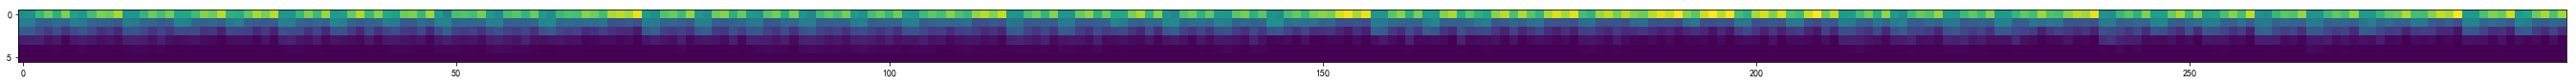

In [222]:
plt.figure(figsize=(50, 1))
plt.imshow(taipei_station.iloc[:, :108*6])